In [1]:
import pandas as pd

In [2]:
from pathlib import Path

In [3]:
OUT = Path.home() /"projects/hltv_parser/normalization/v4_igls.csv"

In [4]:
df = pd.read_csv(OUT)

In [18]:
cols_to_convert = ["firepower", "sniping"]

for col in cols_to_convert:
    df[col] = df[col].astype(str).apply(lambda s: float(Fraction(s)))
    df['sniping']

In [19]:
df["age"] = df["age"].astype(str).str.split().str[0].astype("Int64")

In [20]:
pip install matplotlib

You should consider upgrading via the '/Users/yuriikuzhii/projects/parser_mantra/venv/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


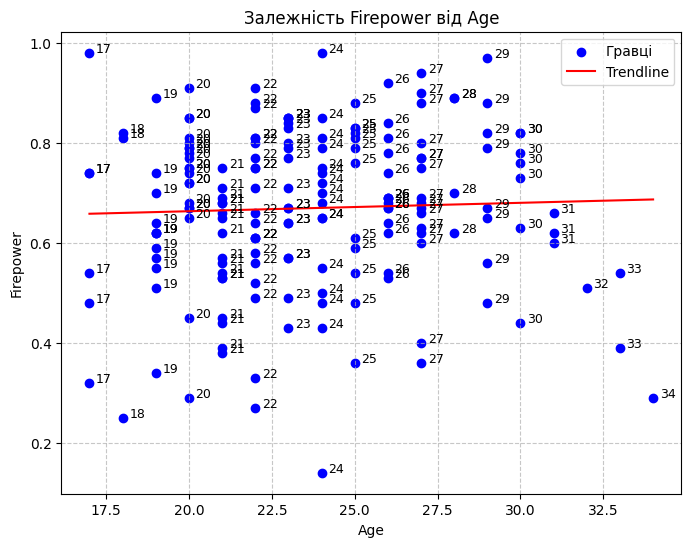

In [8]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

# Точки
plt.scatter(df["age"], df["firepower"], color="blue", label="Гравці")

# Підписати вік біля точок
for i, row in df.iterrows():
    plt.text(row["age"]+0.2, row["firepower"], str(row["age"]), fontsize=9)

# Лінія регресії (лінійна модель)
coef = np.polyfit(df["age"], df["firepower"], 1)   # коефіцієнти (a, b) для ax + b
poly1d_fn = np.poly1d(coef)

# Побудуємо лінію від min(age) до max(age)
x_vals = np.linspace(df["age"].min(), df["age"].max(), 100)
plt.plot(x_vals, poly1d_fn(x_vals), color="red", label="Trendline")

plt.xlabel("Age")
plt.ylabel("Firepower")
plt.title("Залежність Firepower від Age")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

In [9]:
pip install scipy

You should consider upgrading via the '/Users/yuriikuzhii/projects/parser_mantra/venv/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [10]:
df["age"].corr(df["firepower"], method="pearson")

np.float64(0.03890876333692155)

In [11]:
df["age"].corr(df["firepower"], method="spearman")

np.float64(0.0717762625729525)

age
19    1
21    1
22    4
23    2
24    2
25    4
26    3
27    6
29    3
30    2
31    3
33    2
34    1
Name: igl_count, dtype: int64


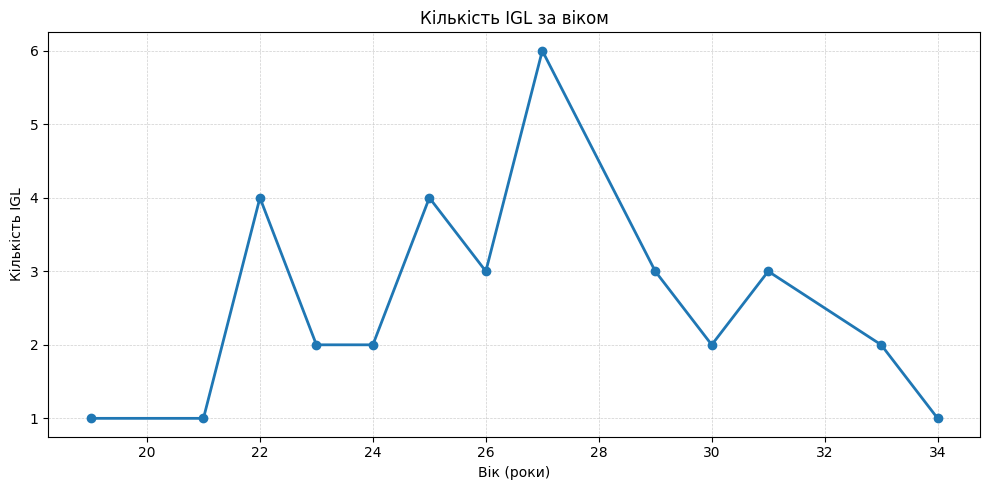

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

df = df.copy()

# (опційно) якщо вік може бути з десятковою частиною — зведи до років:
# df["age_year"] = df["age"].round().astype(int)
# age_col = "age_year"
age_col = "age"  # якщо вже цілі роки

# Нормалізуємо прапорець IGL до булевого
is_igl = (
    df["is_igl"].astype(str).str.strip().str.lower()
      .isin(["1", "true", "yes", "y", "igl"])
)
df["is_igl_bool"] = is_igl

# Кількість IGL у кожному віці
igl_by_age = (
    df.loc[df["is_igl_bool"]]
      .groupby(age_col)
      .size()
      .rename("igl_count")
      .sort_index()
)

print(igl_by_age)  # таблиця age → igl_count

# Графік лише IGL
plt.figure(figsize=(10, 5))
plt.plot(igl_by_age.index, igl_by_age.values, marker="o", linewidth=2)
plt.title("Кількість IGL за віком")
plt.xlabel("Вік (роки)")
plt.ylabel("Кількість IGL")
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.6)
plt.tight_layout()
plt.show()


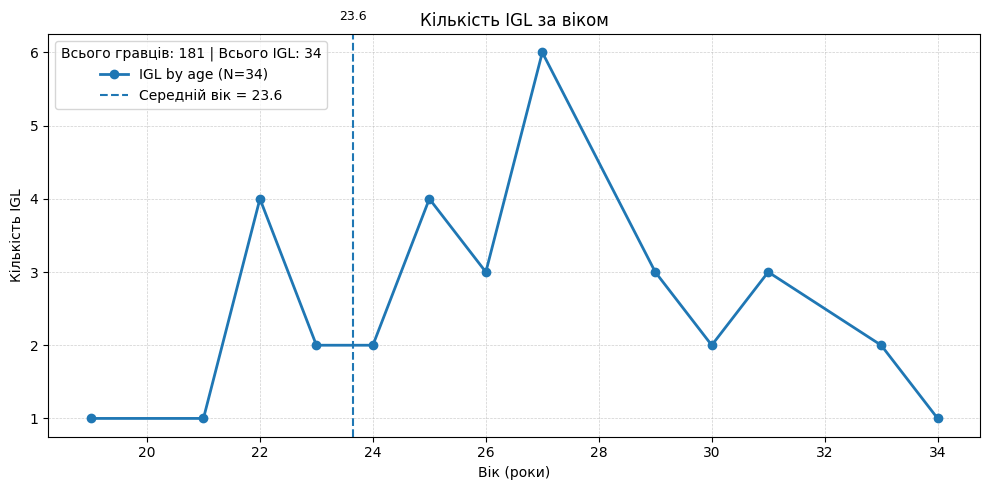

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

df = df.copy()

# Якщо age вже numeric — нічого не робимо; за потреби можна округлити:
# df["age"] = df["age"].round().astype(int)

# Нормалізуємо прапорець IGL до булевого
df["is_igl_bool"] = (
    df["is_igl"].astype(str).str.strip().str.lower()
      .isin(["1", "true", "yes", "y", "igl"])
)

# Загальні лічильники
total_players = df["age"].notna().sum()
total_igl = int(df["is_igl_bool"].sum())

# Кількість IGL у кожному віці
igl_by_age = (
    df.loc[df["is_igl_bool"]]
      .groupby("age")
      .size()
      .rename("igl_count")
      .sort_index()
)

# Середній вік (по всіх гравцях з віком)
mean_age = float(df["age"].mean())

# ПЛОТ
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(igl_by_age.index, igl_by_age.values, marker="o", linewidth=2,
        label=f"IGL by age (N={total_igl})")

# Вертикальна позначка середнього віку + підпис
ax.axvline(mean_age, linestyle="--", linewidth=1.5,
           label=f"Середній вік = {mean_age:.1f}")
ax.annotate(f"{mean_age:.1f}",
            xy=(mean_age, 1), xycoords=("data", "axes fraction"),
            xytext=(0, 8), textcoords="offset points",
            ha="center", va="bottom", fontsize=9)

ax.set_title("Кількість IGL за віком")
ax.set_xlabel("Вік (роки)")
ax.set_ylabel("Кількість IGL")
ax.grid(True, linestyle="--", linewidth=0.5, alpha=0.6)

# Легенда з загальними лічильниками
ax.legend(title=f"Всього гравців: {total_players} | Всього IGL: {total_igl}", loc="upper left")

plt.tight_layout()
plt.show()


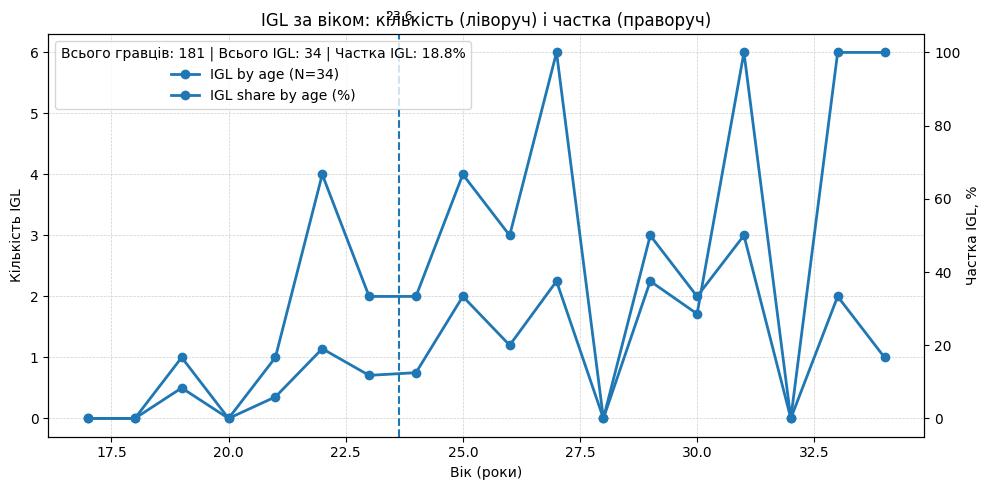

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

df = df.copy()

# Нормалізуємо прапорець IGL до булевого
df["is_igl_bool"] = (
    df["is_igl"].astype(str).str.strip().str.lower()
      .isin(["1","true","yes","y","igl"])
)

# Загальні лічильники і загальна частка
total_players = df["age"].notna().sum()
total_igl = int(df["is_igl_bool"].sum())
overall_share = (total_igl / total_players) if total_players else 0.0

# Агрегації по віку
players_total_by_age = df.groupby("age").size().rename("players_total")
igl_by_age = df.loc[df["is_igl_bool"]].groupby("age").size().rename("igl_count")

summary = (
    pd.concat([players_total_by_age, igl_by_age], axis=1)
      .fillna(0)
      .astype({"players_total": int, "igl_count": int})
      .sort_index()
)
# Частка IGL у кожному віці (igl_count / players_total)
summary["igl_share_age"] = summary["igl_count"] / summary["players_total"].replace(0, pd.NA)

# ПЛОТ: ліва вісь — кількість IGL; права — частка IGL (%)
fig, ax1 = plt.subplots(figsize=(10, 5))
line1, = ax1.plot(summary.index, summary["igl_count"], marker="o",
                  linewidth=2, label=f"IGL by age (N={total_igl})")
ax1.set_xlabel("Вік (роки)")
ax1.set_ylabel("Кількість IGL")
ax1.grid(True, linestyle="--", linewidth=0.5, alpha=0.6)

ax2 = ax1.twinx()
line2, = ax2.plot(summary.index, (summary["igl_share_age"]*100), marker="o",
                  linewidth=2, label="IGL share by age (%)")
ax2.set_ylabel("Частка IGL, %")

# Середній вік — вертикальна лінія
mean_age = float(df["age"].mean())
ax1.axvline(mean_age, linestyle="--", linewidth=1.5,
            label=f"Середній вік = {mean_age:.1f}")
ax1.annotate(f"{mean_age:.1f}",
             xy=(mean_age, 1), xycoords=("data","axes fraction"),
             xytext=(0, 8), textcoords="offset points",
             ha="center", va="bottom", fontsize=9)

# Легенда з підсумками
handles = [line1, line2]
labels = [h.get_label() for h in handles]
legend = ax1.legend(handles, labels,
                    title=f"Всього гравців: {total_players} | Всього IGL: {total_igl} | Частка IGL: {overall_share*100:.1f}%",
                    loc="upper left")

plt.title("IGL за віком: кількість (ліворуч) і частка (праворуч)")
plt.tight_layout()
plt.show()


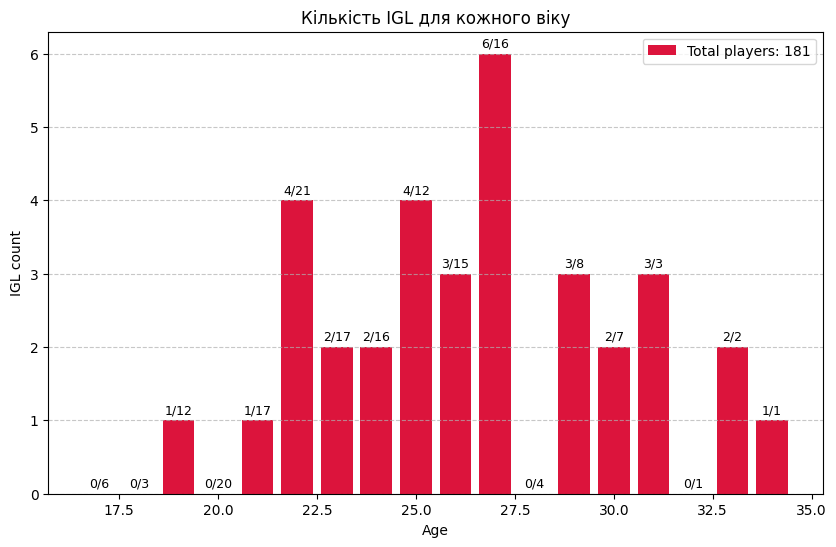

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Агрегуємо дані по віку
age_stats = df.groupby("age").agg(
    total_players=("player", "count"),
    igl_count=("is_igl", "sum"),
    team_count=("team", pd.Series.nunique)
).reset_index()

# Побудова графіка
plt.figure(figsize=(10,6))
plt.bar(age_stats["age"], age_stats["igl_count"], color="crimson", label="IGL count")

# Легенда з кількістю гравців, igl, команд
total_players = df["player"].nunique()
total_igls = df["is_igl"].sum()
total_teams = df["team"].nunique()

plt.legend([
    f"Total players: {total_players}",
    f"IGL count: {total_igls}",
    f"Team count: {total_teams}"
])

plt.xlabel("Age")
plt.ylabel("IGL count")
plt.title("Кількість IGL для кожного віку")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Підписи над стовпцями у форматі "igl/total"
for i, row in age_stats.iterrows():
    plt.text(row["age"], row["igl_count"]+0.05, 
             f"{row['igl_count']}/{row['total_players']}", 
             ha="center", va="bottom", fontsize=9)

plt.show()


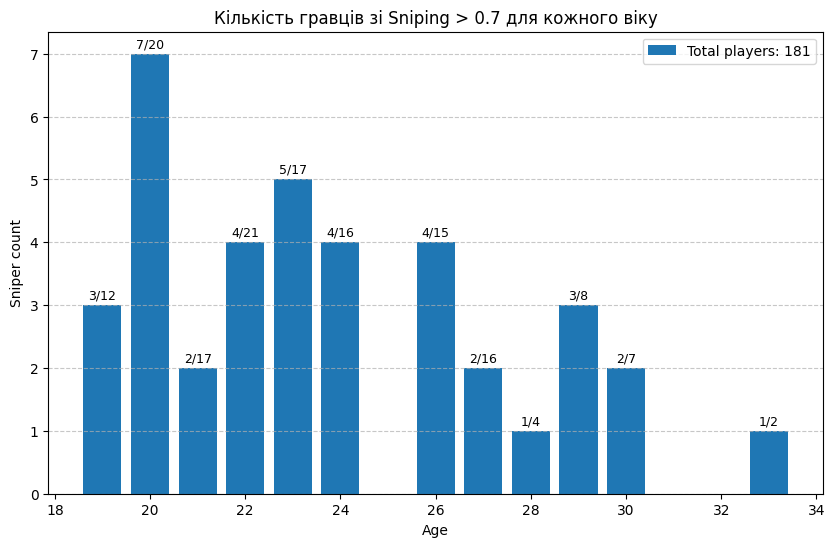

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fractions import Fraction

# 1) Перетворюємо sniping у float (підтримка дробів типу "3/4")
def frac_to_float(x):
    try:
        return float(Fraction(str(x)))
    except Exception:
        return np.nan

df["sniping"] = df["sniping"].apply(frac_to_float)

# 2) Фільтр снайперів
df_snipers = df[df["sniping"] > 0.7].copy()

# 3) Загальна к-сть гравців КОЖНОГО віку (по всьому датасету)
totals_by_age = (
    df.groupby("age")
      .agg(total_players=("player", "nunique"))  # якщо можливі дублікати гравців
      .reset_index()
)

# 4) К-сть снайперів КОЖНОГО віку (тільки з фільтра sniping>0.7)
snipers_by_age = (
    df_snipers.groupby("age")
              .agg(sniper_count=("player", "nunique"))
              .reset_index()
)

# 5) Зводимо разом для підписів "snipers/total"
age_stats = snipers_by_age.merge(totals_by_age, on="age", how="left")

# 6) Побудова графіка
plt.figure(figsize=(10,6))
plt.bar(age_stats["age"], age_stats["sniper_count"], label="Sniping > 0.7")

# Легенда (загальні числа)
legend_total_players = df["player"].nunique()
legend_total_snipers = df_snipers["player"].nunique()
legend_total_teams = df_snipers["team"].nunique()

plt.legend([
    f"Total players: {legend_total_players}",
    f"Snipers > 0.7: {legend_total_snipers}",
    f"Team count: {legend_total_teams}",
])

plt.xlabel("Age")
plt.ylabel("Sniper count")
plt.title("Кількість гравців зі Sniping > 0.7 для кожного віку")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Підписи над стовпчиками у форматі "snipers/total_for_that_age"
for _, r in age_stats.iterrows():
    plt.text(r["age"], r["sniper_count"] + 0.05,
             f"{int(r['sniper_count'])}/{int(r['total_players'])}",
             ha="center", va="bottom", fontsize=9)

plt.show()